In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

In [2]:
import McExperiment
from McExperiment import *
import importlib
importlib.reload(McExperiment)

<module 'McExperiment' from 'd:\\OneDriveLenovoD\\OneDrive\\A_Fall23\\FIN535\\HW2023\\FIN535-Final-23F\\Dec20\\FIN535-Final-23F\\McExperiment.py'>

In [3]:
data = pd.read_csv('data.csv')
data['month'] = data['month'].apply(lambda x: datetime.strptime(x, '%Y-%m')) #assume each date per month is the last day
data.set_index(['month'],inplace=True)

### Run results for best selected allocations

In [4]:
# To manually input Allocation ratio ---- 

alloc_ratio = pd.DataFrame(np.array([[0.6, 0.45, 0.3, 0.7, -0.05], [0.65,0.9,0.45,0.7,-0.55]]),\
    columns = ['x1','x2','x3','x4','x5'], index = ['alloc_1','alloc_2'])


In [5]:
alloc_car_rst = dict()
alloc_car_rst['ratios'] = alloc_ratio
alloc_car_rst['Simu_table'] = [] # simulated results before taking the avg
alloc_car_rst['Cap_table'] = [] # for the financial diamond construction
alloc_car_rst['Summary_table'] = [] # after taking the avg of simulated results, then compute some critical stats


In [6]:
SAVE = 40000
CAP = 50000
g = 0.11
MC = 500
path_length = 120 # 10 year
tax_rate = 0.25


for i in tqdm(range(len(alloc_ratio))):
    ratio = (alloc_ratio.iloc[i,:]).to_list()
    # Get the analysis for end of 5Y/7Y/9Y 
    Simu_table, Simu_cap_table = Experiments_car(MC,path_length,data,CAP,SAVE,g,ratio,years=[60,84,120],tax=tax_rate)
    Summary_table, cap_table = GetSummary(Simu_table, Simu_cap_table, path_length)
    Summary_table = Summary_table.fillna(0)
    alloc_car_rst['Simu_table'].append(Simu_table)
    alloc_car_rst['Cap_table'].append(cap_table)
    alloc_car_rst['Summary_table'].append(Summary_table)

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:18<00:00,  9.03s/it]


In [7]:
alloc_car_rst['Summary_table'][0].round(2)

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,cap VaR,cap CVaR
5Y,219133.72,46755.27,219133.72,0.00,1.57,2.07,0.17,0.42,0.41,-373530.90,-376691.23
7Y,365106.20,72101.61,361740.34,0.02,1.53,2.03,0.19,0.94,0.94,-289333.04,-289333.04
10Y,785191.21,153239.22,484354.09,1.00,1.64,2.23,0.20,1.95,1.95,26689.54,21397.61


In [8]:
alloc_car_rst['Summary_table'][1].round(2)

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,cap VaR,cap CVaR
5Y,247635.87,52311.36,247635.87,0.00,1.46,1.96,0.20,0.51,0.48,-346381.56,-354745.41
7Y,422306.99,67667.07,409453.40,0.09,1.40,1.89,0.23,1.58,1.57,-213958.17,-222870.38
10Y,1020176.69,197673.04,0.00,1.00,1.51,2.09,0.24,3.04,2.93,192039.92,160935.41


In [9]:
with open('storage cache/alloc_car_rst.pkl', 'wb') as file:
    pickle.dump(alloc_car_rst, file)

### Save the results: Plots and Tables

In [21]:
with open('storage cache/alloc_rst.pkl', 'rb') as file:
        alloc_rst = pickle.load(file)

In [25]:
# Get stat table:
ptf_name = ['alloc_1','alloc_2']

df_full = pd.concat(alloc_car_rst['Summary_table'])

In [26]:
df_full

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,cap VaR,cap CVaR
5Y,2.191337e+05,46755.267926,219133.723508,0.000,1.573021,2.074701,0.167841,0.417708,0.409398,-373530.902238,-376691.229075
7Y,3.651062e+05,72101.610688,361740.338967,0.020,1.528757,2.029337,0.193703,0.942425,0.942425,-289333.037041,-289333.037041
10Y,7.851912e+05,153239.224606,484354.085738,0.998,1.636063,2.233839,0.196988,1.946034,1.946034,26689.537415,21397.605955
5Y,2.476359e+05,52311.361394,247635.869755,0.000,1.455022,1.960773,0.199945,0.514469,0.478071,-346381.562064,-354745.411872
7Y,4.223070e+05,67667.074069,409453.401072,0.090,1.395590,1.893034,0.232380,1.575191,1.566696,-213958.173582,-222870.381303
10Y,1.020177e+06,197673.038839,0.000000,1.000,1.511804,2.092525,0.235752,3.043830,2.928418,192039.917049,160935.405283


In [11]:
df_5Y = df_full.loc[df_full.index == '5Y']
indexstr = [sub + ' 5Y' for sub in ptf_name] 
df_5Y.index = indexstr
df_5Y.to_csv('storage cache/stat_alloc_car_5Y.csv')

In [12]:
df_7Y = df_full.loc[df_full.index == '7Y']
indexstr = [sub + ' 7Y' for sub in ptf_name] 
df_7Y.index = indexstr
df_7Y.to_csv('storage cache/stat_alloc_car_7Y.csv')

In [13]:
df_10Y = df_full.loc[df_full.index == '10Y']
indexstr = [sub + ' 10Y' for sub in ptf_name] 
df_10Y.index = indexstr
df_10Y.to_csv('storage cache/stat_alloc_car_10Y.csv')

In [14]:
df_7Y

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,cap VaR,cap CVaR
alloc_1 7Y,365106.195689,72101.610688,361740.338967,0.02,1.528757,2.029337,0.193703,0.942425,0.942425,-289333.037041,-289333.037041
alloc_2 7Y,422306.992992,67667.074069,409453.401072,0.09,1.395590,1.893034,0.232380,1.575191,1.566696,-213958.173582,-222870.381303


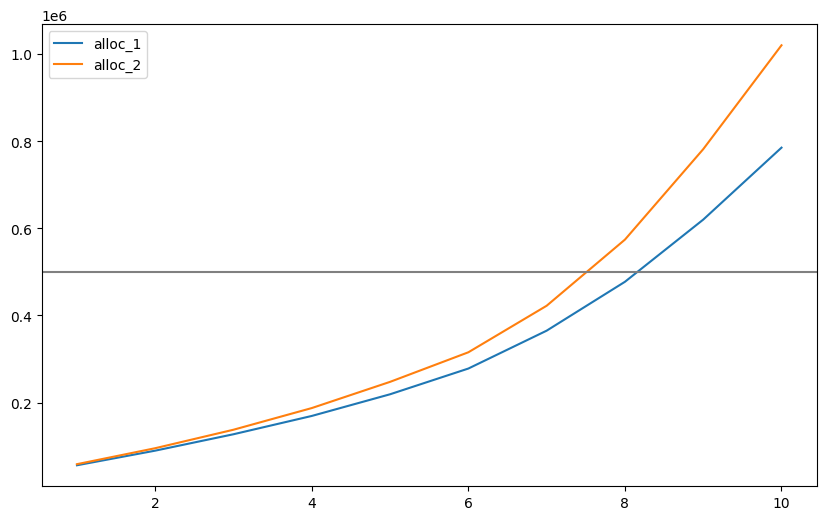

In [15]:
# Capital plot
df_cap = pd.concat(alloc_car_rst['Cap_table'],axis = 1)
df_cap.columns = ptf_name

plt.figure(figsize=(10, 6))
plt.plot(df_cap)
plt.axhline(y=500000, color='grey', linestyle='-')
plt.legend(ptf_name)
plt.savefig('figures/alloc_car_capitalplot_all.png',bbox_inches='tight')
plt.show()


In [24]:
df_cap

,alloc_1,alloc_2
1,56151.039701,58692.530637
2,89722.983616,95351.385862
3,127392.987728,137767.83225
4,169387.299053,187484.743872
5,219133.723508,247635.869755
6,278197.690835,315502.749464
7,365106.195689,422306.992992
8,477301.225167,574098.974608
9,620009.126242,781684.901392
10,785191.212748,1020176.687634


## Financial Diamond

In [22]:
def get_loc(year_pts,cap_pts):
    # points coordinates follows the order of left up right down left(the last one is left is just to connect the points to draw a full diamond)
    x_coor = [year_pts[0],year_pts[1],year_pts[2],year_pts[1],year_pts[0]]
    y_coor = [cap_pts[1],cap_pts[2],cap_pts[1],cap_pts[0],cap_pts[1]]
    return x_coor, y_coor

year_pts = [7,8,9] 
cap_pts_lst = [[alloc_rst['Cap_table'][i].iloc[6,0],alloc_rst['Cap_table'][i].iloc[7,0], \
    alloc_rst['Cap_table'][i].iloc[8,0]] for i in [0,1]] 

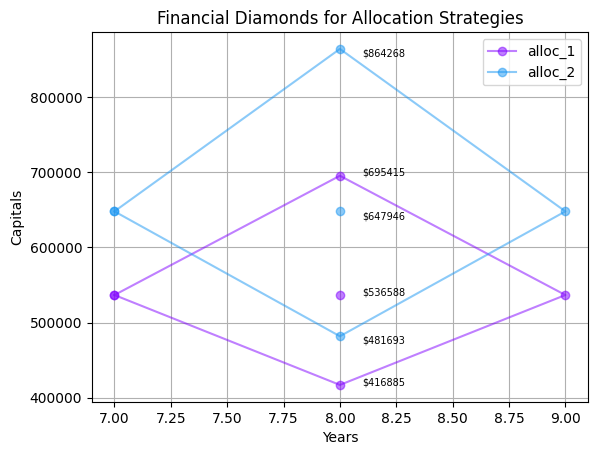

In [23]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
labels = ['alloc_1','alloc_2']
fig, ax = plt.subplots()
for i in range(len(cap_pts_lst)):
    c = next(color)
    x_coor, y_coor = get_loc(year_pts,cap_pts_lst[i])
    ax.plot(x_coor, y_coor, '-o',alpha = 0.5, label=labels[i],c=c)
    ax.plot(x_coor[1], y_coor[0], '-o',alpha = 0.5,c=c)
    for j in range(len(x_coor)-1):
        # TODO: the location of the annotation will need to be changed so that they don't overlap
        if j not in [0,2]:
            ax.annotate(f'${round(y_coor[j])}', (x_coor[j]+0.1, y_coor[j]-10000*(i)),fontsize=7)
    ax.annotate(f'${round(y_coor[0])}', (x_coor[1]+0.1, y_coor[0]-10000*(i)),fontsize=7)
ax.legend()
ax.set_title('Financial Diamonds for Allocation Strategies')
ax.set_xlabel('Years')
ax.set_ylabel('Capitals')
ax.grid()